# Day33 Basic Natural Language Processing

## SMS Spam Detection

Ham = Normal SMS

Spam = Spam SMS

In [23]:
import nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
##rstrip > อ่านข้อความทีละบรรทัด
sms=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [25]:
len(sms)

5574

In [26]:
sms

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

have \t or tap seperate

In [21]:
for sms in enumerate(sms[0:10]):
    print('\n',sms)


 (0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

 (1, 'ham\tOk lar... Joking wif u oni...')

 (2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

 (3, 'ham\tU dun say so early hor... U c already then say...')

 (4, "ham\tNah I don't think he goes to usf, he lives around here though")

 (5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv")

 (6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')

 (7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")

 (8, 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£

In [27]:
for sms_no, sms in enumerate(sms[0:15]):
    print('\n')
    print(sms_no, sms)



0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim c

In [29]:
sms=pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['label','message'])
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


no NaN data

In [32]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### 2. Extract Feature

In [33]:
sms['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

In [35]:
sms['len']=sms['message'].apply(len)
sms

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [38]:
sms['message'].ilog[1]

AttributeError: 'Series' object has no attribute 'ilog'

### 3. Data Visualization

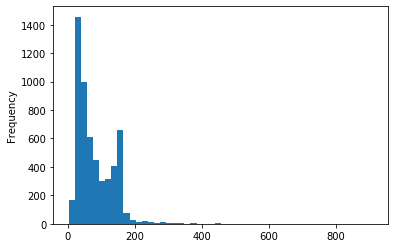

In [39]:
sms['len'].plot(bins=50,kind='hist')

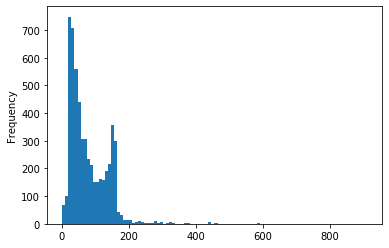

In [40]:
sms['len'].plot(bins=100,kind='hist')

In [41]:
sms.len.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [49]:
sms[sms['len']==910].iloc[0][1]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [50]:
sms[sms['len']==910].iloc[0][0]

'ham'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000153816EB508>,
      dtype=object)

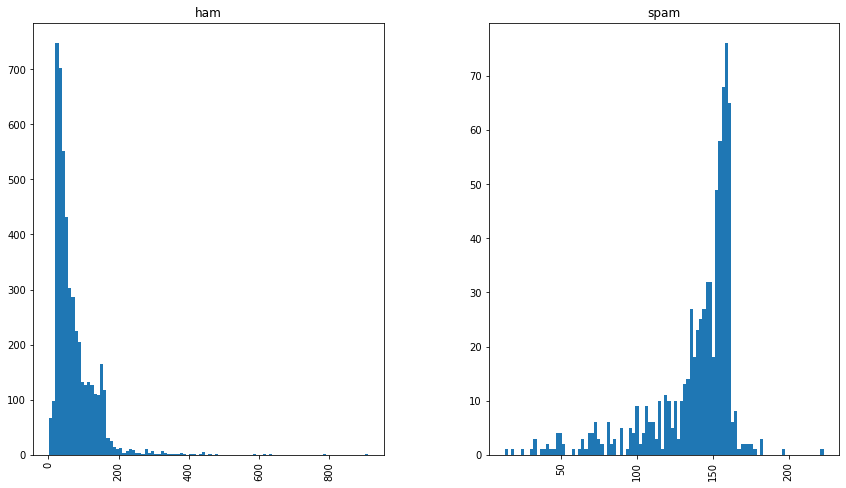

In [52]:
sms.hist(column='len',by='label',bins=100,figsize=(14,8))

In [55]:
for i in range(11):
    print('\n', sms[sms['label']=='ham'].iloc[i][1])


 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

 Ok lar... Joking wif u oni...

 U dun say so early hor... U c already then say...

 Nah I don't think he goes to usf, he lives around here though

 Even my brother is not like to speak with me. They treat me like aids patent.

 As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

 I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.

 I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.

 I HAVE A DATE ON SUNDAY WITH WILL!!

 Oh k...i'm watching here:)

 Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.


In [56]:
for i in range(11):
    print('\n', sms[sms['label']=='spam'].iloc[i][1])


 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

 FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

 WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

 Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info

 URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt m

#### Remove Punctuation

In [57]:
import string

In [58]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
sms

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [60]:
test='I **want to try! to remove?? punctuation: in = the sentence'

In [61]:
no_punc=[x for x in test if x not in string.punctuation]

In [62]:
no_punc #message split

['I',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 't',
 'r',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e']

In [76]:
no_punc=''.join(no_punc)

#### Remove Stopword

##### Stopwords = คำที่มีอยู่เยอะจนมันไม่มีความหมายอะไร

In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boont\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords

In [69]:
len(stopwords.words('english'))

179

In [70]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [73]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [74]:
'want' in stopwords.words('english')

False

In [77]:
no_punc.split()

['I',
 'want',
 'to',
 'try',
 'to',
 'remove',
 'punctuation',
 'in',
 'the',
 'sentence']

In [79]:
[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

['want', 'try', 'remove', 'punctuation', 'sentence']

#### Create Text Process function

In [80]:
def text_process(mess):
    no_punc=[x for x in mess if x not in string.punctuation]
    
    no_punc=''.join(no_punc)
    
    text=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return text

In [81]:
sms['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [82]:
sms['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#### Bag-Of-Words

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sms['message'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000015382094948>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [86]:
len(bow_transformer.vocabulary_)

11425

In [87]:
sms['message'][1]

'Ok lar... Joking wif u oni...'

In [92]:
bow_test=bow_transformer.transform([sms['message'][3]])

we get sparse metrix

In [93]:
print(bow_test)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [95]:
print(bow_transformer.get_feature_names()[4608])
print(bow_transformer.get_feature_names()[4629])
print(bow_transformer.get_feature_names()[5261])
print(bow_transformer.get_feature_names()[6204])
print(bow_transformer.get_feature_names()[6222])
print(bow_transformer.get_feature_names()[7186])
print(bow_transformer.get_feature_names()[9554])

alexs
already
c
dun
early
hor
say


In [96]:
bow_sms=bow_transformer.transform(sms['message'])
bow_sms

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [97]:
bow_sms.nnz

50548

In [98]:
5562*11425

63545850

In [99]:
50548/63545850*100

0.07954571384283946

In [101]:
print('Shape of Sparse Matrix', bow_sms.shape)
print('None Zero', bow_sms.nnz)
print('% of Sparsity:',bow_sms.nnz*100/(bow_sms.shape[0]*bow_sms.shape[1]))

Shape of Sparse Matrix (5572, 11425)
None Zero 50548
% of Sparsity: 0.07940295412668218


ratio of element in Sparse Matrix that is not zero is 0.079 which is really low

#### TF-IDF

In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

In [103]:
tfidf_transformer=TfidfTransformer().fit(bow_sms)
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [104]:
bow_test

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [105]:
tfidf_test=tfidf_transformer.transform(bow_test)

In [106]:
print(tfidf_test)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [108]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['time']])

4.410753029960551


In [109]:
tfidf_sms=tfidf_transformer.transform(bow_sms)
tfidf_sms

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

#### Classifier

In [110]:
## use Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [114]:
nb=MultinomialNB()

In [111]:
y=sms['label']

In [112]:
x=tfidf_sms

In [116]:
spam_detection=nb.fit(x,y)
spam_detection

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

finish create model

In [118]:
#we didn't split test-train, so we will use same dataset for testing
predicted = spam_detection.predict(x)
predicted

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [119]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

#### Evaluation

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [122]:
confusion_matrix(y,predicted)

array([[4825,    0],
       [ 115,  632]], dtype=int64)

4825 true negatives

115  false negatives

632  true positives

0    false positives

In [123]:
print('Acc:', accuracy_score(y,predicted))

Acc: 0.9793610911701364


In [124]:
# have to assign which one is positive for f1
print('F1 Score:', f1_score(y,predicted,pos_label='ham'))

print('Precision Score:', precision_score(y, predicted,pos_label='ham'))

print('Recall Score:', recall_score(y, predicted,pos_label='ham'))

F1 Score: 0.9882232462877625
Precision Score: 0.9767206477732794
Recall Score: 1.0


can't believe this value too much since we use same train data and test data

#### Train and Test Split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
sms_train,sms_test,label_train,label_test= train_test_split(sms['message'],sms['label'],test_size=0.2)

In [129]:
print(len(sms_train))
print(sms_train)

4457
1501                   Host-based IDPS for linux systems.
1115    No no:)this is kallis home ground.amla home to...
3792    Twinks, bears, scallies, skins and jocks are c...
1190    In that case I guess I'll see you at campus lodge
5384    How are you babes. Hope your doing ok. I had a...
                              ...                        
1644                  U WILL SWITCH YOUR FONE ON DAMMIT!!
3515    I always chat with you. In fact i need money c...
689            Thanks love. But am i doing torch or bold.
3521    No it will reach by 9 only. She telling she wi...
4930    Got what it takes 2 take part in the WRC Rally...
Name: message, Length: 4457, dtype: object


In [130]:
print(len(sms_test))
print(sms_test)

1115
4297    Please CALL 08712402578 immediately as there i...
912                               I am sorry it hurt you.
867     Same here, but I consider walls and bunkers an...
5222    5 nights...We nt staying at port step liao...T...
2979    Yar lor... Keep raining non stop... Or u wan 2...
                              ...                        
3735                    4 tacos + 1 rajas burrito, right?
4717    Hey. What happened? U switch off ur cell d who...
413     Okies... I'll go yan jiu too... We can skip ar...
2044    4mths half price Orange line rental & latest c...
1608    Jus telling u dat i'll b leaving 4 shanghai on...
Name: message, Length: 1115, dtype: object


#### Data Pipeline

In [131]:
from sklearn.pipeline import Pipeline

In [132]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [133]:
pipeline.fit(sms_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000015382094948>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [134]:
predicted = pipeline.predict(sms_test)

In [135]:
predicted

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [136]:
confusion_matrix(label_test,predicted)

array([[953,   0],
       [ 40, 122]], dtype=int64)

In [137]:
print('Acc:', accuracy_score(label_test,predicted))

Acc: 0.9641255605381166


In [138]:
print('F1 Score:', f1_score(label_test,predicted,pos_label='ham'))

print('Precision Score:', precision_score(label_test, predicted,pos_label='ham'))

print('Recall Score:', recall_score(label_test, predicted,pos_label='ham'))

F1 Score: 0.9794450154162384
Precision Score: 0.959718026183283
Recall Score: 1.0


In [139]:
print('F1 Score:', f1_score(label_test,predicted,pos_label='spam'))

print('Precision Score:', precision_score(label_test, predicted,pos_label='spam'))

print('Recall Score:', recall_score(label_test, predicted,pos_label='spam'))

F1 Score: 0.8591549295774648
Precision Score: 1.0
Recall Score: 0.7530864197530864


#### Extra

In [141]:
df=pd.DataFrame(data=sms_test)
df['label']=label_test
df['predicted']=predicted

In [142]:
df

,message,label,predicted
4297,Please CALL 08712402578 immediately as there i...,spam,ham
912,I am sorry it hurt you.,ham,ham
867,"Same here, but I consider walls and bunkers an...",ham,ham
5222,5 nights...We nt staying at port step liao...T...,ham,ham
2979,Yar lor... Keep raining non stop... Or u wan 2...,ham,ham
...,...,...,...
3735,"4 tacos + 1 rajas burrito, right?",ham,ham
4717,Hey. What happened? U switch off ur cell d who...,ham,ham
413,Okies... I'll go yan jiu too... We can skip ar...,ham,ham
2044,4mths half price Orange line rental & latest c...,spam,spam


In [143]:
with pd.option_context('display.max_rows',None):
    display(df)

,message,label,predicted
4297,Please CALL 08712402578 immediately as there i...,spam,ham
912,I am sorry it hurt you.,ham,ham
867,"Same here, but I consider walls and bunkers an...",ham,ham
5222,5 nights...We nt staying at port step liao...T...,ham,ham
2979,Yar lor... Keep raining non stop... Or u wan 2...,ham,ham
2527,Do u noe how 2 send files between 2 computers?,ham,ham
4925,We can go 4 e normal pilates after our intro...,ham,ham
1601,K.then any other special?,ham,ham
209,You please give us connection today itself bef...,ham,ham
5503,Perhaps * is much easy give your account ident...,ham,ham
